In [1]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [2]:
from textblob import TextBlob
text="hmm"
blob=TextBlob(text)
sentiment=blob.sentiment
if sentiment.polarity>0:
    sentiment_label="positive"
elif sentiment.polarity<0:
    sentiment_label="negative"
else:
    sentiment_label="neutral"
print(text)
print("Sentiment Label:",sentiment_label)

hmm
Sentiment Label: neutral


In [3]:
!pip install tensorflow

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8766 - loss: 0.4334 - val_accuracy: 0.9575 - val_loss: 0.1394
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9524 - loss: 0.1576
Test accuracy: 0.9574999809265137
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


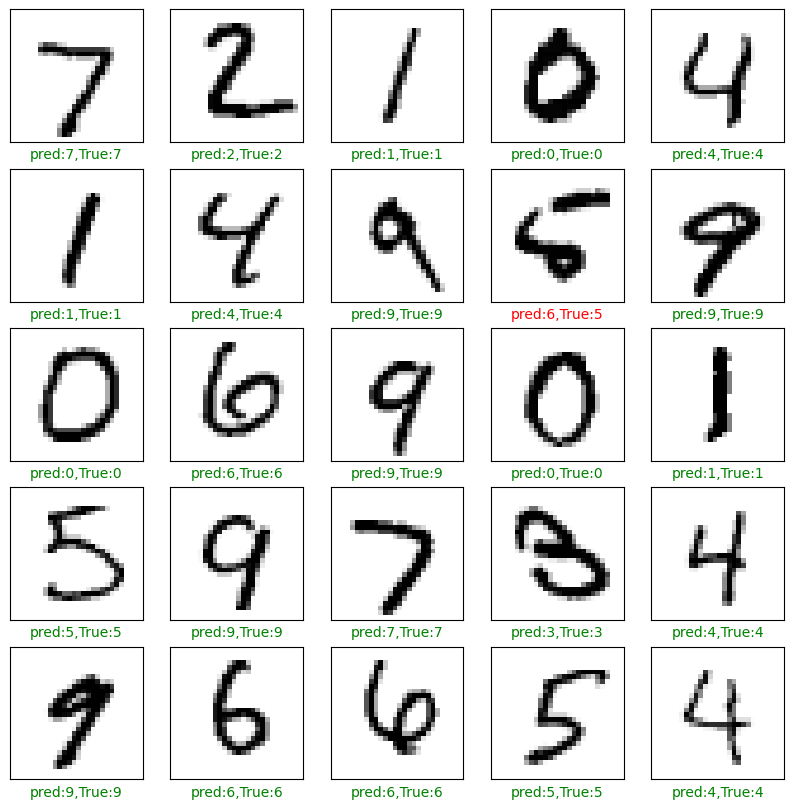

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train/255.0
x_test=x_test/255.0
model=Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train,y_train,epochs=1,batch_size=32,validation_data=(x_test,y_test))
test_loss,test_acc=model.evaluate(x_test,y_test)
print('Test accuracy:',test_acc)
predictions=model.predict(x_test)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i],cmap=plt.cm.binary)
    predicted_label=np.argmax(predictions[i])
    true_label=y_test[i]
    if predicted_label==true_label:
        color='green'
    else:
        color='red'
    plt.xlabel(f'pred:{predicted_label},True:{true_label}', color=color)
plt.show()

In [5]:
pip install mediapipe

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import cv2
import mediapipe as mp
import math
def detect_gesture(frame,hand_landmarks):
    frame_with_gesture=frame.copy()
    if hand_landmarks:
        for hand_landmark in hand_landmarks:
            index_x,index_y=hand_landmark.landmark[mp.solutions.hands.HandLandmark.INDEX_FINGER_TIP].x,hand_landmark.landmark[mp.solutions.hands.HandLandmark.INDEX_FINGER_TIP].y
            middle_x,middle_y=hand_landmark.landmark[mp.solutions.hands.HandLandmark.INDEX_FINGER_TIP].x,hand_landmark.landmark[mp.solutions.hands.HandLandmark.MIDDLE_FINGER_TIP].y
            distance=math.sqrt((middle_x-index_x)**2+(middle_y-index_y)**2)
            cv2.line(frame_with_gesture,(int(index_x*frame.shape[1]),int(index_y*frame.shape[0])),
                     (int(middle_x*frame.shape[1]),int(middle_y*frame.shape[0])),(0,255,0),2)
            print("Distance between fingers:",distance)
            if distance < THRESHOLD:
                gesture_name="Gesture A"
            else:
                gesture_name="Gesture B"
            print("Gesture:",gesture_name)
            cv2.putText(frame_with_gesture,gesture_name,(50,50),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2,cv2.LINE_AA)
    return frame_with_gesture
def main():
    cap=cv2.VideoCapture(0)
    mp_hands=mp.solutions.hands.Hands()
    while cap.isOpened():
        ret,frame=cap.read()
        if not ret:
            break
        rgb_frame=cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
        results=mp_hands.process(rgb_frame)
        frame_with_gesture=detect_gesture(frame,results.multi_hand_landmarks)
        cv2.imshow('Hand Gesture Recognition',frame_with_gesture)
        if cv2.waitKey(10) & 0xFF== ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()
if __name__=="__main__":
    main()
